![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/08/Text-Generation-With-LSTM-Recurrent-Neural-Networks-in-Python-with-Keras.jpg)

Thanks for the help [DF Sarkar](https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72)

In [27]:
import pandas as pd

In [3]:
doc =[
    'hawks',
    'patriots',
    'steelers',
    'cheese',
    'panthers',
    'cardinals'
    
]

In [ ]:
import json
def open_json(label):
    doc = json.dumps(doc, indent=4, sort_keys=True, default=str)
    with open(label+'_news.json', 'w') as outfile:
        json.dump(doc, outfile)

In [18]:
import json
from pprint import pprint
def open_json(doc):
    with open(doc+'_news.json', encoding='utf-8') as f:
        doc = json.load(f)
    doc = json.loads(doc)
    return doc

In [23]:
# [open_json(x) for x in doc]
hawks = open_json('hawks')
patriots = open_json('patriots')
steelers = open_json('steelers')
cheese = open_json('cheese')
panthers = open_json('panthers')
cardinals = open_json('cardinals')


In [24]:
hawks[0]

{'date': '2018-08-22 00:00:00',
 'keywords': ['thing',
  'mock',
  'hit',
  'midpreseason',
  'followed',
  'watch',
  'seahawks',
  'vs',
  'draft',
  '3000',
  'thats',
  'rob',
  'weeks',
  'nfl',
  'vikings',
  'twitter'],
 'text': 'A new episode of 3000 NFL Mock Draft: A Seahawks Podcast!\n\nMe and Rob discuss Seattle’s loss to the Chargers, Germain Ifedi vs George Fant, Rasheem’s Green rapid development at defensive end, and more. Then go into what to expect in the next two preseason games, while Rob answers some quick-hit questions from me about who will make the team and whether that’s a good thing or a bad thing. Followed by some players to watch in next week’s NCAA opening schedule.\n\nThe Seahawks play the Minnesota Vikings on Friday at 5 PM PST, followed by the finale next Thursday against Marshawn Lynch and the Raiders.\n\nIf you like the show and want to support it, please consider donating to the Patreon. Follow Field Gulls on Twitter and Facebook. Rob on Twitter and a l

## Build Dataset

In [ ]:
doc =[
    'hawks',
    'patriots',
    'steelers',
    'cheese',
    'panthers',
    'cardinals'
    
]

In [52]:
hawks_df = pd.DataFrame(hawks)
hawks_df['team'] = 'seahawks'
df['seahawks'] = hawks_df

patriots_df = pd.DataFrame(patriots)
patriots_df['team'] = 'patriots'
df['patriots'] = patriots_df

steelers_df = pd.DataFrame(steelers)
steelers_df['team'] = 'steelers'
df['steelers'] = steelers_df

cheese_df = pd.DataFrame(cheese)
cheese_df['team'] = 'cheese'
df['cheese'] = cheese_df

panthers_df = pd.DataFrame(panthers)
panthers_df['team'] = 'panthers'
df['panthers'] = panthers_df

cardinals_df = pd.DataFrame(cardinals)
cardinals_df['team'] = 'cardinals'
df['cardinals'] = cardinals_df

new_df = pd.concat(df.values())

In [53]:
new_df.head()

date                                           keywords  \
0  2018-08-22 00:00:00  [thing, mock, hit, midpreseason, followed, wat...   
1  2018-08-22 00:00:00  [season, know, 2018, good, nfl, game, wont, zo...   
2  2018-08-22 00:00:00  [season, know, 2018, good, nfl, game, wont, zo...   
3  2018-08-22 00:00:00  [tape, seattle, play, darrell, bevell, defensi...   
4  2018-08-22 00:00:00  [tape, seattle, play, darrell, bevell, defensi...   

                                                text  \
0  A new episode of 3000 NFL Mock Draft: A Seahaw...   
1  The Seahawks knew they wouldn’t need Nick Vann...   
2  The Seahawks knew they wouldn’t need Nick Vann...   
3  There’s excitement and intrigue surrounding th...   
4  There’s excitement and intrigue surrounding th...   

                                               title  \
0     3000 NFL Mock Draft: Seahawks hit midpreseason   
1  NFL breakout players 2018: Seahawks have a new...   
2  NFL breakout players 2018: Seahawks have a new...   
3  Seahawks on tape: Seattle’s offense should kee...   
4  Seahawks on tape: Seattle’s offense should kee...   

                                                 url      team  
0  https://www.fieldgulls.com/2018/8/22/17772216/...  seahawks  
1  https://www.sbnation.com/nfl/2018/8/22/1765323...  seahawks  
2  https://www.sbnation.com/nfl/2018/8/22/1765323...  seahawks  
3  https://www.fieldgulls.com/2018/8/22/17770004/...  seahawks  
4  https://www.fieldgulls.com/2018/8/22/17770004/...  seahawks

remove duplicate articles

In [159]:
nfl = new_df.drop_duplicates(subset='text')

searching for keywords

In [167]:
nfl[nfl.keywords.apply(lambda x: 'bryant' in x)]

date                                           keywords  \
127  2018-08-22 00:00:00  [makes, way, happen, sign, thinks, think, rout...   
131  2018-08-22 00:00:00  [makes, way, midpreseason, roster, form, wont,...   
163  2018-04-15 00:00:00  [season, panthers, carolina, play, free, agenc...   

                                                  text  \
127  The Patriots should sign Dez Bryant. It couldn...   
131  Dez Bryant to the Patriots makes way too much ...   
163  The Carolina Panthers are not expected to purs...   

                                                 title  \
127  Dez Bryant to the Patriots makes way too much ...   
131  New England Patriots links 8/22/18 - 53-Man ro...   
163  NFL free agency: Carolina Panthers not expecte...   

                                                   url      team  \
127  https://www.patspulpit.com/2018/8/22/17770742/...  patriots   
131  https://www.patspulpit.com/2018/8/22/17768074/...  patriots   
163  https://www.catscratchreader.com/2018/4/15/172...  panthers   

                                            clean_text  
127  patriot sign dez bryant could not obvious not ...  
131  dez bryant patriot make way much sense happen ...  
163  carolina panther not expect pursue recently re...

## Text Wrangling & Preprocessing

In [56]:
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import CONTRACTION_MAP
import unicodedata
nlp = spacy.load('en', parse=True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, #entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [62]:
# https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [63]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [60]:
news_df = new_df

In [64]:
news_df['clean_text'] = normalize_corpus(news_df['text'])
norm_corpus = list(news_df['clean_text'])

In [65]:
news_df.iloc[1][['text', 'clean_text']].to_dict()

{'clean_text': 'seahawk know would not need nick vannett set world fire right away spend third round pick vannett year trade jimmy graham first season vannett low fourth depth chart time behind graham luke willson brandon william last spring william sign colt allow vannett move least third team make decent contribution team primarily extra blocker run play even end start four game head season graham willson go finally vannetts time excellent opportunity step full time starter role season flourish offense predict next breakout star nfl team retire nfl defensive end stephen white grind tape summer figure player poise big leap forward team breakout player pound vannett give seattle quarterback russell wilson huge target pass game vannett not big lug either look fluid fast running route field pretty good hand well unlike graham vannett also damn good blocker mean not liability seahawk want run ball vannett probably not ever receive threat graham lot well rounded graham may not make spectac

save to csv

In [66]:
news_df.to_csv('news.csv', index=False, encoding='utf-8')

named entity recognition with `SpaCy` Here is the [Entity Meanings](https://spacy.io/api/annotation#named-entities)

In [68]:
from spacy import displacy

sentence = str(news_df.iloc[1].text)
sentence_nlp = nlp(sentence)

# print named entities in article
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

# visualize named entities
displacy.render(sentence_nlp, style='ent', jupyter=True)

[(Nick, 'PERSON'), (Vannett, 'PERSON'), (third, 'ORDINAL'), (Vannett, 'PERSON'), (2016, 'DATE'), (a, 'DATE'), (year, 'DATE'), (Jimmy, 'PERSON'), (Graham, 'PERSON'), (first, 'ORDINAL'), (Vannett, 'PERSON'), (as, 'CARDINAL'), (low, 'CARDINAL'), (as, 'CARDINAL'), (fourth, 'CARDINAL'), (Graham, 'PERSON'), (Luke, 'PERSON'), (Willson, 'PERSON'), (Brandon, 'PERSON'), (Williams, 'PERSON'), (Last, 'DATE'), (spring, 'DATE'), (Williams, 'PERSON'), (Colts, 'PERSON'), (Vannett, 'PERSON'), (at, 'CARDINAL'), (least, 'CARDINAL'), (third, 'CARDINAL'), (four, 'CARDINAL'), (the, 'DATE'), (2018, 'DATE'), (season, 'DATE'), (Graham, 'PERSON'), (Willson, 'ORG'), (Vannett, 'PERSON'), (Predicting, 'GPE'), (32, 'CARDINAL'), (NFL, 'ORG'), (Retired, 'PERSON'), (NFL, 'PERSON'), (Stephen, 'PERSON'), (White, 'PERSON'), (all, 'DATE'), (summer, 'DATE'), (2018, 'DATE'), (6’6, 'CARDINAL'), (261, 'QUANTITY'), (pounds, 'QUANTITY'), (Vannett, 'PERSON'), (Seattle, 'GPE'), (Russell, 'PERSON'), (Wilson, 'PERSON'), (Graham, 'P

## Sentiment Analysis with AFINN Lexicon

Let’s now find out the most frequent named entities in our news corpus! For this, we will build out a data frame of all the named entities and their types using the following code.

In [71]:
# create a basic pre-processed corpus, don't lowercase to get POS context
corpus = normalize_corpus(news_df['text'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

In [70]:
# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

In [73]:
sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [75]:
df = pd.DataFrame([list(news_df['team']), sentiment_scores, sentiment_category]).T

In [76]:
df.columns = ['team', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['team']).describe()

sentiment_score                                                 \
                    count       mean        std   min   25%   50%    75%   
team                                                                       
cardinals           141.0  17.070922  20.019507 -21.0  4.00  12.0  26.00   
cheese              139.0  15.381295  28.868115 -57.0  0.50   8.0  22.00   
panthers            166.0  12.487952  17.213363 -26.0  1.25   6.5  18.75   
patriots            185.0  23.329730  54.724750 -67.0  0.00  13.0  28.00   
seahawks            151.0  19.410596  30.898386 -45.0  0.00  11.0  32.50   
steelers             38.0   9.394737  12.985521 -31.0  0.00  10.0  21.00   

                  
             max  
team              
cardinals   86.0  
cheese     175.0  
panthers    65.0  
patriots   448.0  
seahawks   135.0  
steelers    34.0

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

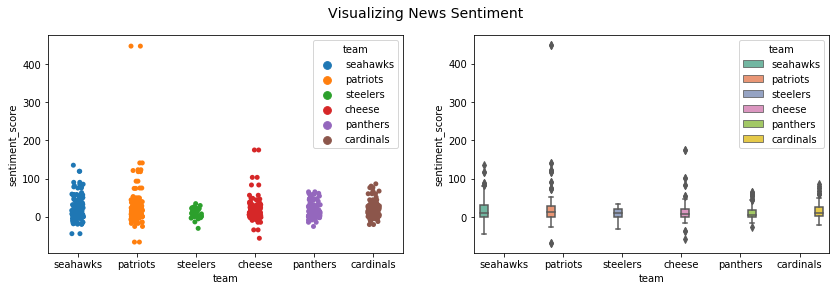

In [81]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='team', y="sentiment_score", 
                   hue='team', data=df, ax=ax1)
bp = sns.boxplot(x='team', y="sentiment_score", 
                 hue='team', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

/home/redne/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


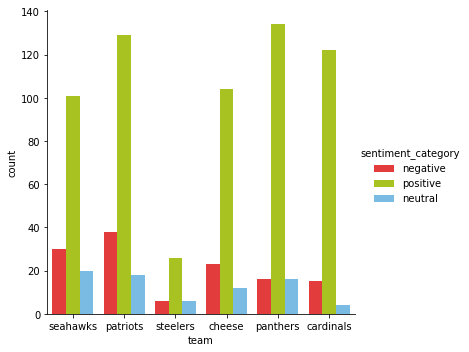

In [82]:
fc = sns.factorplot(x="team", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

Let’s dive deeper into the most positive and negative sentiment news articles for technology news.

In [171]:
pos_idx = df[(df.team=='seahawks') & (df.sentiment_score == 6)].index[0]
neg_idx = df[(df.team=='seahawks') & (df.sentiment_score == -15)].index[0]

print('Most Negative Tech News Article:', news_df.iloc[neg_idx][['title']][0])
print()
print('Most Positive Tech News Article:', news_df.iloc[pos_idx][['title']][0])

Most Negative Tech News Article: Century Links 8/20: Who Impressed, Who Didn’t After Chargers Preseason Game

Most Positive Tech News Article: A few pics from Training Camp 8/13
